# Example of how to use the functions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functions.peakutils import *
from functions.files import *
from functions.modelfitting import *
from functions.otherfunctions import *
from functions.peakselection import *
from functions.plotting import *

In [2]:
plt.rcParams['figure.figsize'] = [16, 4]

In [3]:
# Load already processed peaklists to save time
peaklists = loadPeaklists("peaklists/1/")
peaklists2 = loadPeaklists("peaklists/2/")
peaklists3 = loadPeaklists("peaklists/3/")

10/60 files loaded.
20/60 files loaded.
30/60 files loaded.
40/60 files loaded.
50/60 files loaded.
60/60 files loaded.
10/29 files loaded.
20/29 files loaded.
10/100 files loaded.
20/100 files loaded.
30/100 files loaded.
40/100 files loaded.
50/100 files loaded.
60/100 files loaded.
70/100 files loaded.
80/100 files loaded.
90/100 files loaded.
100/100 files loaded.


In [4]:
file = "Example_Inputs/test/spectrum_2020-00-17_17_11_07.csv"

data1 = readFile(file)

In [5]:
# Process several files from a certain path, can take a long time if there are a large number of files
# peaklists = getPeaklists("path_containing_the_files", 5e-4, "KOionfolder/Allions1ex.csv")

# Process one file
peaklist = identifyPeaks(data1, pd.read_csv("KOionfolder/Allions1ex.csv"), 5e-4)
print(peaklist)

C:\Users\Jaakko\anaconda3\lib\site-packages\scipy\optimize\optimize.py:1166: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (np.dot(yk, sk))


         formula          mz    observed             a     sigma   peak
1           O3N-   61.988366   61.988374  2.194915e+06  0.000094    5.0
2       O3N[15]-   62.985401   62.985426  7.337760e+03  0.000096   10.0
3      O2O[17]N-   62.992584   62.992604  2.351821e+03  0.000096   11.0
4      O2O[18]N-   63.992613   63.992624  1.386558e+04  0.000097   12.0
9         C2HO4-   88.988032   88.988122  2.313051e+03  0.000135   15.0
..           ...         ...         ...           ...       ...    ...
262  C14H16O5NF-  297.101799  297.101841  9.729300e+02  0.000451   96.0
266   C11H16O9N-  306.083055  306.082588  2.298653e+02  0.000464   97.0
269  C10H14O10N-  308.062319  308.062115  8.128451e+02  0.000467   98.0
274  C10H16O10N-  310.077969  310.077611  6.271590e+02  0.000470   99.0
282  C10H14O11N-  324.057234  324.057232  4.911236e+02  0.000491  100.0

[78 rows x 6 columns]


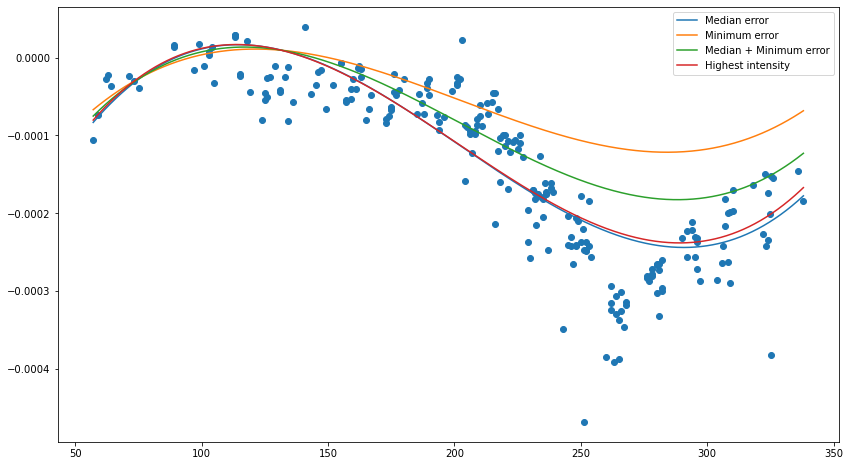

Median error:
8.92% of the prefit MSE

Minimum error:
34.46% of the prefit MSE

Median + Minimum error:
16.44% of the prefit MSE

Highest intensity:
11.45% of the prefit MSE


array([0.08915701, 0.34459279, 0.16443173, 0.11450795])

In [6]:
plt.rcParams['figure.figsize'] = [14, 8]
# Fit a polynomial model with the following parameters
# using different peak selection methods and plot the result
degree = 4
n = 2
k = 12
q = 0.5
fitPolynomialAll(peaklists2[13], degree, n, k, q, True, True)[2]

In [7]:
# Calculate errors for all the peaklists in peaklists2 using a polynomial fit with 1-5 degrees
# using the highest intensity peak selection method with different values of n and k
#
# This can take a while to run
errors2HI = calculateErrors(peaklists2, selectPeaksHighestIntensity, 20, 30)

C:\Users\Jaakko\Documents\GitHub\DataScienceProject1-Orbitrap\functions\plotting.py:132: RuntimeWarning: divide by zero encountered in log
  avg[i,ii]=np.log(np.mean(errors[degree,:,i,ii]))


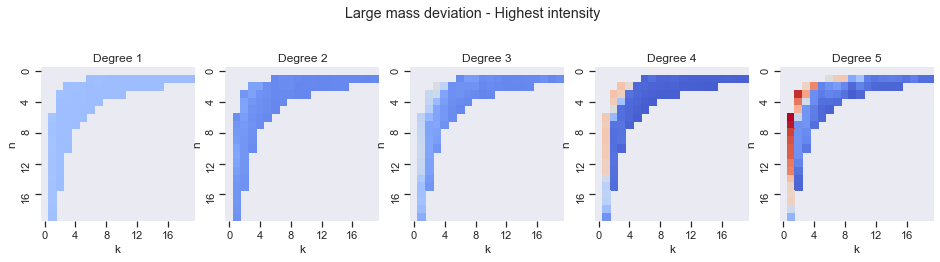

In [8]:
# Plot the errors calculated in the previous cell
plotPeaklists3(errors2HI, "Large mass deviation - Highest intensity")

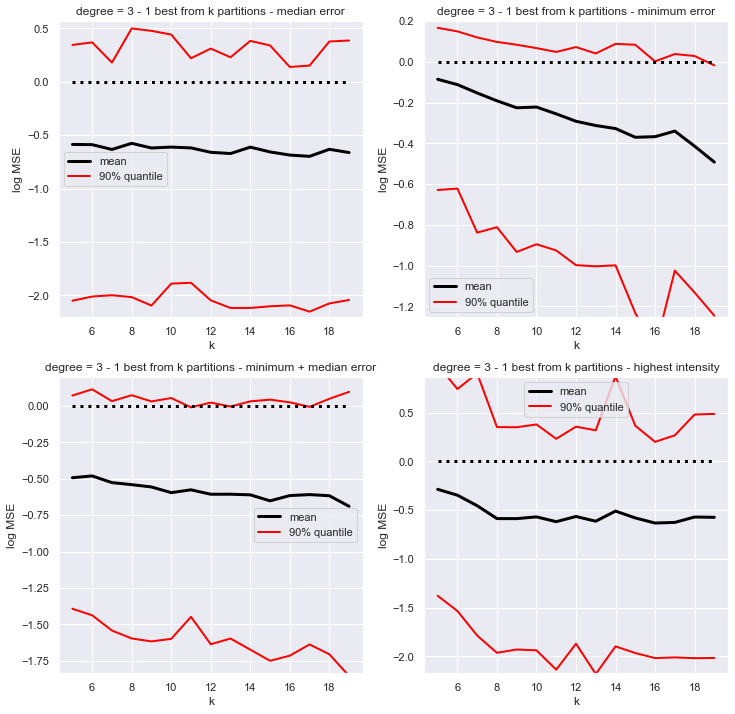

In [10]:
# Plot different peak selection methods using a polynomial fit with degree=3
# using different values of k (uses different values of n if change_n=True)
# the values of k will from starting_k to starting_k+amount
# 
# This can take a while to run
degree = 3
change_n = False
starting_n = 1
starting_k = 5
amount = 15

plt.rcParams['figure.figsize'] = [12, 12]
plotPeaklists(peaklists3, degree, change_n, starting_n, starting_k, amount)

In [11]:
# Combine multiple peaklists into one dataframe
peaklists = [peaklist, peaklists2[0], peaklists3[0]]
combineObservations(peaklists)

,mz,observed,observed_1,observed_2
formula,,,,
O3N-,61.988366,61.988374,61.988338,61.988397
O3N[15]-,62.985401,62.985426,62.985380,62.985445
O2O[17]N-,62.992584,62.992604,62.992561,62.992632
O2O[18]N-,63.992613,63.992624,63.992575,63.992645
C2HO4-,88.988032,88.988122,88.988044,88.988157
...,...,...,...,...
C14H16O5NF-,297.101799,297.101841,297.101804,297.101840
C11H16O9N-,306.083055,306.082588,306.082841,306.082949
C10H14O10N-,308.062319,308.062115,308.062108,308.062214


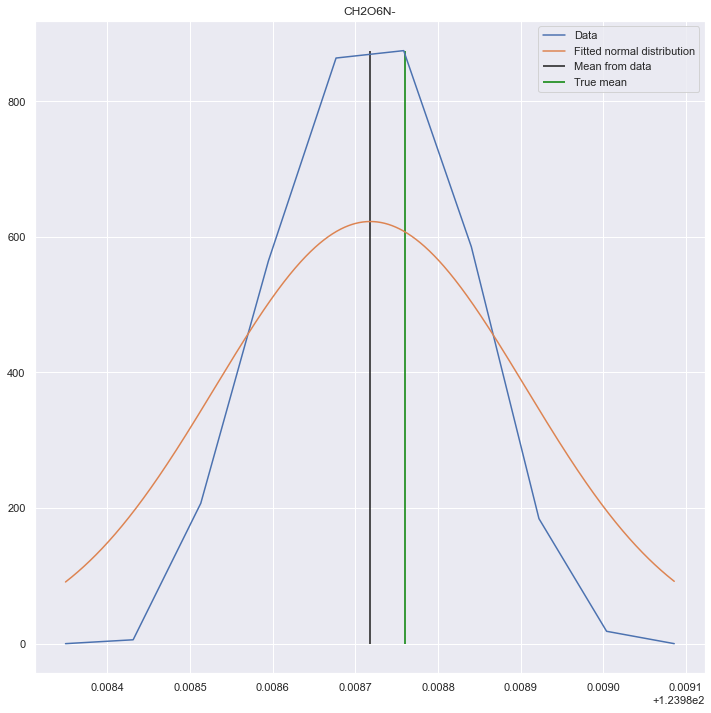

In [12]:
# Plot ith peak
i = 8
plotPeak(i, peaklist, data1)